In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling  import SMOTE
from sklearn.tree import DecisionTreeClassifier

# loading the data set

In [2]:
df=pd.read_csv("Downloads\HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
df.corr().T

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
df.shape

(14999, 10)

In [10]:
columns=df.columns


In [11]:
for col in columns:
    print(col,":",len(df[col].unique()))

satisfaction_level : 92
last_evaluation : 65
number_project : 6
average_montly_hours : 215
time_spend_company : 8
Work_accident : 2
left : 2
promotion_last_5years : 2
Department : 10
salary : 3


In [12]:
for col in columns:
    print(col,":",df[col].value_counts())

satisfaction_level : 0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.12     30
0.26     30
Name: satisfaction_level, Length: 92, dtype: int64
last_evaluation : 0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64
number_project : 4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64
average_montly_hours : 156    153
135    153
149    148
151    147
160    136
      ... 
297      7
303      6
288      6
299      6
96       6
Name: average_montly_hours, Length: 215, dtype: int64
time_spend_company : 3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64
Work_accident : 0    12830
1     2169
Name: Work_accident, dtype: int64
left : 0    11428
1     3571
Name: left, dtype: int64
promotion_last

In [13]:
#Exploratory data analysis
cols=df.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


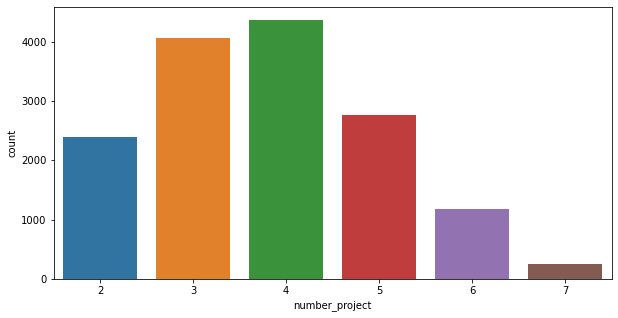

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


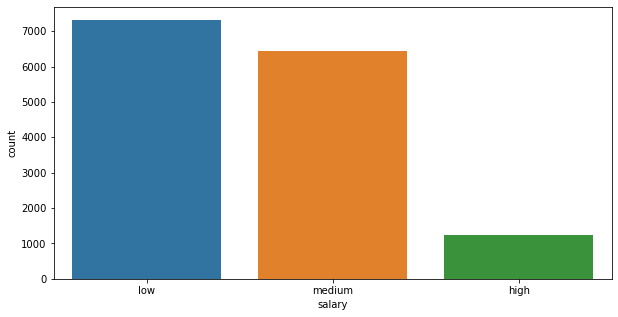

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


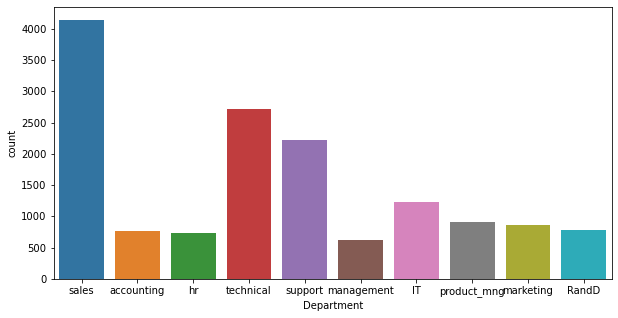

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


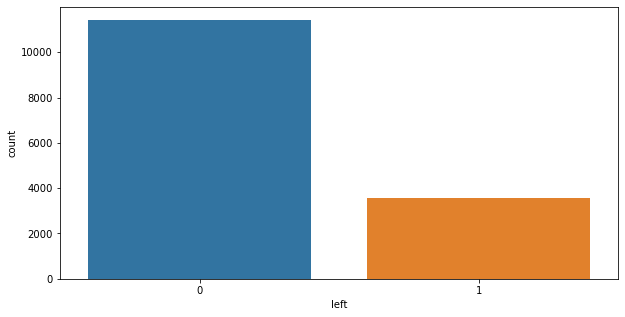

In [14]:
for i in ['number_project','salary','Department','left']:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.show()

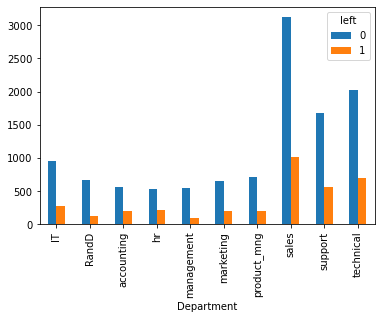

In [15]:

pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='salary'>

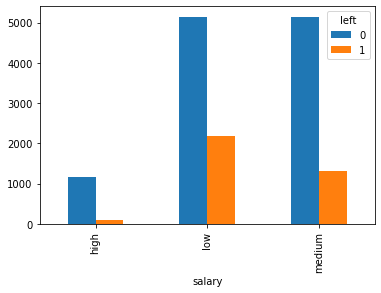

In [16]:
pd.crosstab(df.salary,df.left).plot(kind='bar')


In [17]:
#Feature engineering
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
hr=df[['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','salary']]

In [19]:
hr.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium
3,0.72,223,5,0,low
4,0.37,159,3,0,low


In [20]:
#ordinal Encoding
encoder=ce.OrdinalEncoder(cols=['salary'])
x=encoder.fit_transform(hr)

C:\Users\GUDA\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
# x matrix and y vector
x=x.values
y=df['left']


# splitting the data set

In [22]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
lr=linear_model.LogisticRegression()

In [24]:
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
lr.score(x_test,y_test)

0.7717777777777778

In [26]:
lr.score(x_train,y_train)

0.7690256214877608

In [27]:
y_hat=lr.predict(x_test)

In [28]:
cm=metrics.confusion_matrix(y_test,y_hat)
cm

array([[3198,  264],
       [ 763,  275]], dtype=int64)

<AxesSubplot:>

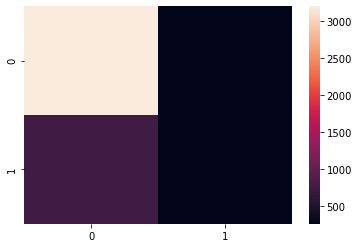

In [29]:
sns.heatmap(cm)

In [30]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.61      4500
weighted avg       0.74      0.77      0.74      4500



In [31]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [52]:
df.left.value_counts()/df.left.value_counts().sum()*100

0    76.191746
1    23.808254
Name: left, dtype: float64

# oversampling

In [40]:
smote=SMOTE(sampling_strategy='minority')

In [47]:
x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)

In [48]:
x_train_sm.shape

(15932, 5)

In [50]:
y_train_sm.shape

(15932,)

In [53]:
log=linear_model.LogisticRegression()
log.fit(x_train_sm,y_train_sm)

LogisticRegression()

In [54]:
log.score(x_test,y_test)

0.7331111111111112

In [55]:
log.score(x_train_sm,y_train_sm)

0.7253954305799648

In [56]:
y_predic=log.predict(x_test)

# classifaction report for test data

In [58]:
print('classification report:','\n',metrics.classification_report(y_test,y_predic))

classification report: 
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      3462
           1       0.45      0.71      0.55      1038

    accuracy                           0.73      4500
   macro avg       0.67      0.73      0.68      4500
weighted avg       0.79      0.73      0.75      4500



In [61]:
dt=DecisionTreeClassifier(max_depth=3,random_state=3)
dt.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=3, random_state=3)

In [62]:
dt.score(x_test,y_test)

0.9042222222222223

In [63]:
y_hat1=dt.predict(x_test)

In [70]:
print('test data:','\n',metrics.classification_report(y_test,y_hat1))

test data: 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      3462
           1       0.73      0.94      0.82      1038

    accuracy                           0.90      4500
   macro avg       0.85      0.92      0.88      4500
weighted avg       0.92      0.90      0.91      4500

